In [1]:
using CSV
using DataFrames
full_dataframe = CSV.read("C://Users//tuedo//Documents//PandemicJohnHopkinsData//Pandemic//policy.csv", DataFrame);

In [2]:
size(full_dataframe)

(3142, 216)

In [3]:
# We will analyze the correlations between confirmed cases and mask mandates
names(full_dataframe)[1]

"Column1"

In [4]:
df = full_dataframe[:, filter(x -> (x in ["stname", "Mandate face mask use by all individuals in public spaces"]),
        names(full_dataframe))]
rename!(df, [:stname, :mask_mandate_date])

,stname,mask_mandate_date
,String,String
1,Alabama,7/16/20
2,Alabama,7/16/20
3,Alabama,7/16/20
4,Alabama,7/16/20
5,Alabama,7/16/20
6,Alabama,7/16/20
7,Alabama,7/16/20
8,Alabama,7/16/20
9,Alabama,7/16/20


In [5]:
# Since maskmandates are enforced statewide, we can condense into 51 rows, one for each state and D.C.
state_date_df = unique(df)

,stname,mask_mandate_date
,String,String
1,Alabama,7/16/20
2,Alaska,4/24/20
3,Arizona,0
4,Arkansas,7/20/20
5,California,6/18/20
6,Colorado,7/16/20
7,Connecticut,4/20/20
8,Delaware,4/28/20
9,District of Columbia,4/17/20


In [6]:
# We separate into two dataframes, one containing states with mask mandates, and one with states without
mandate_state_df = state_date_df[state_date_df[:, :mask_mandate_date] .!= "0", :]

,stname,mask_mandate_date
,String,String
1,Alabama,7/16/20
2,Alaska,4/24/20
3,Arkansas,7/20/20
4,California,6/18/20
5,Colorado,7/16/20
6,Connecticut,4/20/20
7,Delaware,4/28/20
8,District of Columbia,4/17/20
9,Hawaii,4/16/20


In [7]:
no_mandate_state_df = state_date_df[state_date_df[:, :mask_mandate_date] .== "0", :]

,stname,mask_mandate_date
,String,String
1,Arizona,0
2,Florida,0
3,Georgia,0
4,Idaho,0
5,Iowa,0
6,Missouri,0
7,Montana,0
8,Nebraska,0
9,Oklahoma,0


In [8]:
cases_dataframe = CSV.read("C://Users//tuedo//Documents//PandemicJohnHopkinsData//Pandemic//casesAndDeaths.csv", DataFrame)

,Column1,stfips,stname,ctyfips,ctyname,fips,confirmed_cases_20200122
,Int64,Int64,String,Int64,String,Int64,Int64
1,0,1,Alabama,1,Autauga County,1001,0
2,1,1,Alabama,3,Baldwin County,1003,0
3,2,1,Alabama,5,Barbour County,1005,0
4,3,1,Alabama,7,Bibb County,1007,0
5,4,1,Alabama,9,Blount County,1009,0
6,5,1,Alabama,11,Bullock County,1011,0
7,6,1,Alabama,13,Butler County,1013,0
8,7,1,Alabama,15,Calhoun County,1015,0
9,8,1,Alabama,17,Chambers County,1017,0


In [9]:
size(cases_dataframe)

(3142, 794)

In [10]:
# The csv files contains columns for confirmed cases and deaths. We only consider cases in this analysis.
st_cases_dataframe = select(cases_dataframe, Between(3,3), Between(7,400))

,stname,confirmed_cases_20200122,confirmed_cases_20200123,confirmed_cases_20200124
,String,Int64,Int64,Int64
1,Alabama,0,0,0
2,Alabama,0,0,0
3,Alabama,0,0,0
4,Alabama,0,0,0
5,Alabama,0,0,0
6,Alabama,0,0,0
7,Alabama,0,0,0
8,Alabama,0,0,0
9,Alabama,0,0,0


In [11]:
# Currently the DataFrame considers cases per days per county for all counties in the country.
# We want to get a number for each day for each state. A simple way to do this is to split the DataFrame into
# separate DataFrames for each state, summing all the counties and then reaggregating the data into a single state.
group_st_df = groupby(st_cases_dataframe, [:stname])

,stname,confirmed_cases_20200122,confirmed_cases_20200123,confirmed_cases_20200124
,String,Int64,Int64,Int64
1,Alabama,0,0,0
2,Alabama,0,0,0
3,Alabama,0,0,0
4,Alabama,0,0,0
5,Alabama,0,0,0
6,Alabama,0,0,0
7,Alabama,0,0,0
8,Alabama,0,0,0
9,Alabama,0,0,0


In [12]:
# Create our new aggregate DataFrame
st_daily_cases_df = DataFrame();

# I couldn't find a clean way to create each column automatically, so I generated code to print code to aggregate the data.
for i in 1:51
    state = group_st_df[i].stname[1]
    idx = i
    println("st_daily_cases_df.$state = sum.(eachcol(group_st_df[$idx][:,2:end]));")
end

st_daily_cases_df.Alabama = sum.(eachcol(group_st_df[1][:,2:end]));
st_daily_cases_df.Alaska = sum.(eachcol(group_st_df[2][:,2:end]));
st_daily_cases_df.Arizona = sum.(eachcol(group_st_df[3][:,2:end]));
st_daily_cases_df.Arkansas = sum.(eachcol(group_st_df[4][:,2:end]));
st_daily_cases_df.California = sum.(eachcol(group_st_df[5][:,2:end]));
st_daily_cases_df.Colorado = sum.(eachcol(group_st_df[6][:,2:end]));
st_daily_cases_df.Connecticut = sum.(eachcol(group_st_df[7][:,2:end]));
st_daily_cases_df.Delaware = sum.(eachcol(group_st_df[8][:,2:end]));
st_daily_cases_df.District of Columbia = sum.(eachcol(group_st_df[9][:,2:end]));
st_daily_cases_df.Florida = sum.(eachcol(group_st_df[10][:,2:end]));
st_daily_cases_df.Georgia = sum.(eachcol(group_st_df[11][:,2:end]));
st_daily_cases_df.Hawaii = sum.(eachcol(group_st_df[12][:,2:end]));
st_daily_cases_df.Idaho = sum.(eachcol(group_st_df[13][:,2:end]));
st_daily_cases_df.Illinois = sum.(eachcol(group_st_df[14][:,2:end]));
st_daily_cases_df.India

In [13]:
# Note that I have to manually replaced blankspace with underscores (e.g. "df.New_York" not "df.New York")
# This isn't too bad for a handful of states, but perhaps I could have written code to do it automatically in the case
# I want to do a county analysis.
st_daily_cases_df.Alabama = sum.(eachcol(group_st_df[1][:,2:end]));
st_daily_cases_df.Alaska = sum.(eachcol(group_st_df[2][:,2:end]));
st_daily_cases_df.Arizona = sum.(eachcol(group_st_df[3][:,2:end]));
st_daily_cases_df.Arkansas = sum.(eachcol(group_st_df[4][:,2:end]));
st_daily_cases_df.California = sum.(eachcol(group_st_df[5][:,2:end]));
st_daily_cases_df.Colorado = sum.(eachcol(group_st_df[6][:,2:end]));
st_daily_cases_df.Connecticut = sum.(eachcol(group_st_df[7][:,2:end]));
st_daily_cases_df.Delaware = sum.(eachcol(group_st_df[8][:,2:end]));
st_daily_cases_df.District_of_Columbia = sum.(eachcol(group_st_df[9][:,2:end]));
st_daily_cases_df.Florida = sum.(eachcol(group_st_df[10][:,2:end]));
st_daily_cases_df.Georgia = sum.(eachcol(group_st_df[11][:,2:end]));
st_daily_cases_df.Hawaii = sum.(eachcol(group_st_df[12][:,2:end]));
st_daily_cases_df.Idaho = sum.(eachcol(group_st_df[13][:,2:end]));
st_daily_cases_df.Illinois = sum.(eachcol(group_st_df[14][:,2:end]));
st_daily_cases_df.Indiana = sum.(eachcol(group_st_df[15][:,2:end]));
st_daily_cases_df.Iowa = sum.(eachcol(group_st_df[16][:,2:end]));
st_daily_cases_df.Kansas = sum.(eachcol(group_st_df[17][:,2:end]));
st_daily_cases_df.Kentucky = sum.(eachcol(group_st_df[18][:,2:end]));
st_daily_cases_df.Louisiana = sum.(eachcol(group_st_df[19][:,2:end]));
st_daily_cases_df.Maine = sum.(eachcol(group_st_df[20][:,2:end]));
st_daily_cases_df.Maryland = sum.(eachcol(group_st_df[21][:,2:end]));
st_daily_cases_df.Massachusetts = sum.(eachcol(group_st_df[22][:,2:end]));
st_daily_cases_df.Michigan = sum.(eachcol(group_st_df[23][:,2:end]));
st_daily_cases_df.Minnesota = sum.(eachcol(group_st_df[24][:,2:end]));
st_daily_cases_df.Mississippi = sum.(eachcol(group_st_df[25][:,2:end]));
st_daily_cases_df.Missouri = sum.(eachcol(group_st_df[26][:,2:end]));
st_daily_cases_df.Montana = sum.(eachcol(group_st_df[27][:,2:end]));
st_daily_cases_df.Nebraska = sum.(eachcol(group_st_df[28][:,2:end]));
st_daily_cases_df.Nevada = sum.(eachcol(group_st_df[29][:,2:end]));
st_daily_cases_df.New_Hampshire = sum.(eachcol(group_st_df[30][:,2:end]));
st_daily_cases_df.New_Jersey = sum.(eachcol(group_st_df[31][:,2:end]));
st_daily_cases_df.New_Mexico = sum.(eachcol(group_st_df[32][:,2:end]));
st_daily_cases_df.New_York = sum.(eachcol(group_st_df[33][:,2:end]));
st_daily_cases_df.North_Carolina = sum.(eachcol(group_st_df[34][:,2:end]));
st_daily_cases_df.North_Dakota = sum.(eachcol(group_st_df[35][:,2:end]));
st_daily_cases_df.Ohio = sum.(eachcol(group_st_df[36][:,2:end]));
st_daily_cases_df.Oklahoma = sum.(eachcol(group_st_df[37][:,2:end]));
st_daily_cases_df.Oregon = sum.(eachcol(group_st_df[38][:,2:end]));
st_daily_cases_df.Pennsylvania = sum.(eachcol(group_st_df[39][:,2:end]));
st_daily_cases_df.Rhode_Island = sum.(eachcol(group_st_df[40][:,2:end]));
st_daily_cases_df.South_Carolina = sum.(eachcol(group_st_df[41][:,2:end]));
st_daily_cases_df.South_Dakota = sum.(eachcol(group_st_df[42][:,2:end]));
st_daily_cases_df.Tennessee = sum.(eachcol(group_st_df[43][:,2:end]));
st_daily_cases_df.Texas = sum.(eachcol(group_st_df[44][:,2:end]));
st_daily_cases_df.Utah = sum.(eachcol(group_st_df[45][:,2:end]));
st_daily_cases_df.Vermont = sum.(eachcol(group_st_df[46][:,2:end]));
st_daily_cases_df.Virginia = sum.(eachcol(group_st_df[47][:,2:end]));
st_daily_cases_df.Washington = sum.(eachcol(group_st_df[48][:,2:end]));
st_daily_cases_df.West_Virginia = sum.(eachcol(group_st_df[49][:,2:end]));
st_daily_cases_df.Wisconsin = sum.(eachcol(group_st_df[50][:,2:end]));
st_daily_cases_df.Wyoming = sum.(eachcol(group_st_df[51][:,2:end]));

In [14]:
# This is the result
st_daily_cases_df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,1,0,2,0,0,0
6,0,0,1,0,2,0,0,0
7,0,0,1,0,2,0,0,0
8,0,0,1,0,2,0,0,0
9,0,0,1,0,2,0,0,0


In [15]:
# We now want to convert our date dataframe into integer values of days after January 22, 2020
# The Dates package is useful here
using Dates

start_date = Date("1/22/20", "m/d/y")

0020-01-22

In [16]:
# Generate a new column for our existing dataframe of mandated states
diff_dates = [Dates.value(Date(date, "m/d/y") - start_date) for date in mandate_state_df[!, 2]]

38-element Vector{Int64}:
 176
  93
 180
 148
 176
  89
  97
  86
  85
 100
 187
 163
 110
   ⋮
 297
 183
 161
 161
  87
 163
  79
 192
 128
 156
 167
 192

In [17]:
mandate_state_df.num_days = diff_dates;
mandate_state_df

,stname,mask_mandate_date,num_days
,String,String,Int64
1,Alabama,7/16/20,176
2,Alaska,4/24/20,93
3,Arkansas,7/20/20,180
4,California,6/18/20,148
5,Colorado,7/16/20,176
6,Connecticut,4/20/20,89
7,Delaware,4/28/20,97
8,District of Columbia,4/17/20,86
9,Hawaii,4/16/20,85


In [18]:
size(st_daily_cases_df)

(394, 51)

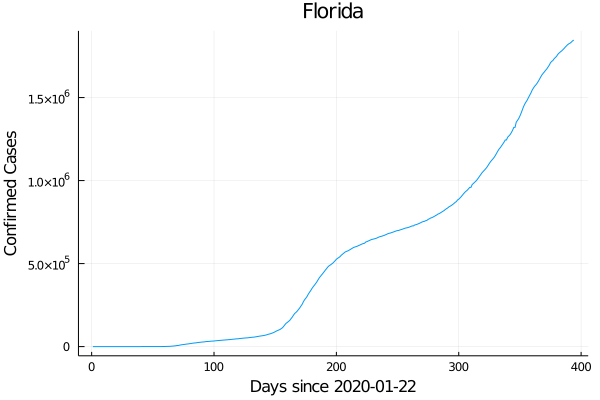

In [19]:
# Here is some preliminary analysis for Florida and Illinois
using StatsPlots
daily_index = [i for i in 1:394];
st_daily_cases_df.index = daily_index;
@df st_daily_cases_df plot(
    :index, :Florida, 
    legend=false,
    title="Florida",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases"
)

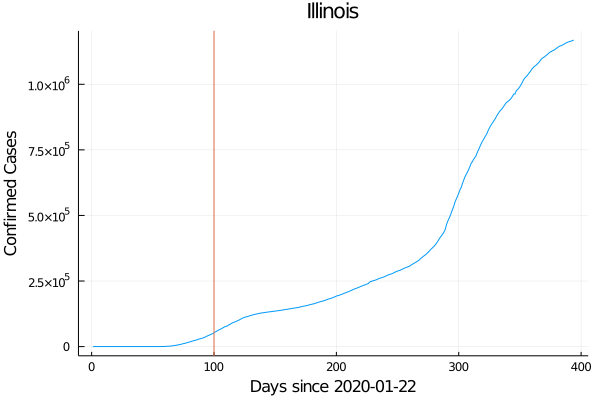

In [20]:
@df st_daily_cases_df plot(
    :index, :Illinois, 
    legend=false,
    title="Illinois",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases"
)
plot!([100], seriestype="vline")

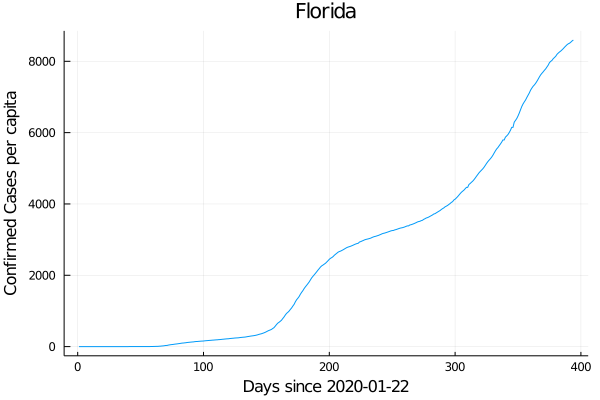

In [21]:
# We decide that comparing case per capita is more revealing, and it isn't difficult to generate new columns
# within Julia's included methods.
# Population data from quick Google search (perhaps more rigorous data could be found)
pop_florida = 21.48 * 10^6
pop_illinois = 12.67 * 10^6
st_daily_cases_df.Illinois_per_capita = st_daily_cases_df[!, :Illinois] ./ (pop_illinois / 10^5)
st_daily_cases_df.Florida_per_capita = st_daily_cases_df[!, :Florida] ./ (pop_florida / 10^5);

@df st_daily_cases_df plot(
    :index, :Florida_per_capita, 
    legend=false,
    title="Florida",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)

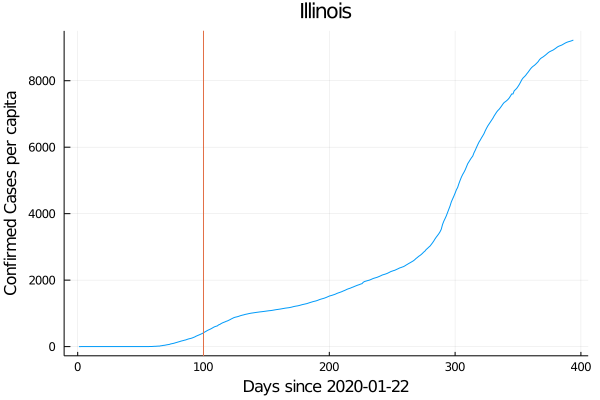

In [22]:
# Perhaps we could have written a function to run this code for different states...
@df st_daily_cases_df plot(
    :index, :Illinois_per_capita, 
    legend=false,
    title="Illinois",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)
plot!([100], seriestype="vline")

In [23]:
using DataFramesMeta
@where(mandate_state_df, :stname.=="Texas")

,stname,mask_mandate_date,num_days
,String,String,Int64
1,Texas,7/3/20,163


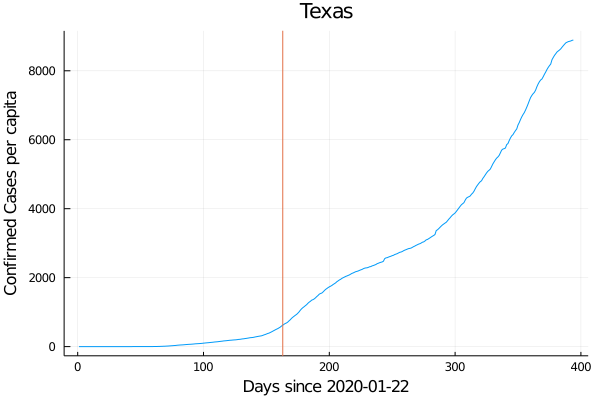

In [24]:
pop_texas = 29.0 * 10^6
st_daily_cases_df.Texas_per_capita = st_daily_cases_df[!, :Texas] ./ (pop_texas / 10^5)

@df st_daily_cases_df plot(
    :index, :Texas_per_capita, 
    legend=false,
    title="Texas",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)
plot!([163], seriestype="vline")

In [25]:
@where(mandate_state_df, :stname.=="North Dakota")

,stname,mask_mandate_date,num_days
,String,String,Int64
1,North Dakota,11/14/20,297


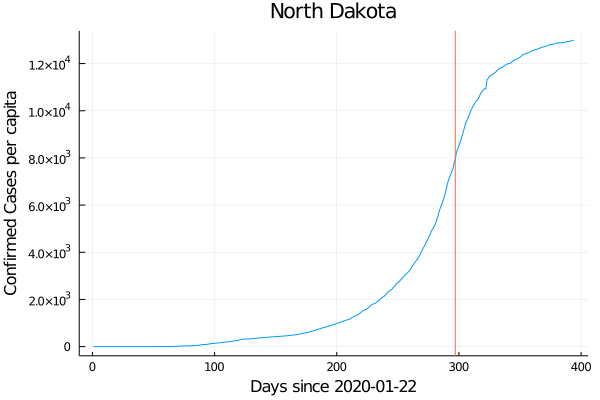

In [26]:
pop_north_dakota = 762.0 * 10^3
st_daily_cases_df.North_Dakota_per_capita = st_daily_cases_df[!, :North_Dakota] ./ (pop_north_dakota / 10^5)

@df st_daily_cases_df plot(
    :index, :North_Dakota_per_capita, 
    legend=false,
    title="North Dakota",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)
plot!([297], seriestype="vline")

In [27]:
@where(mandate_state_df, :stname.=="California")

,stname,mask_mandate_date,num_days
,String,String,Int64
1,California,6/18/20,148


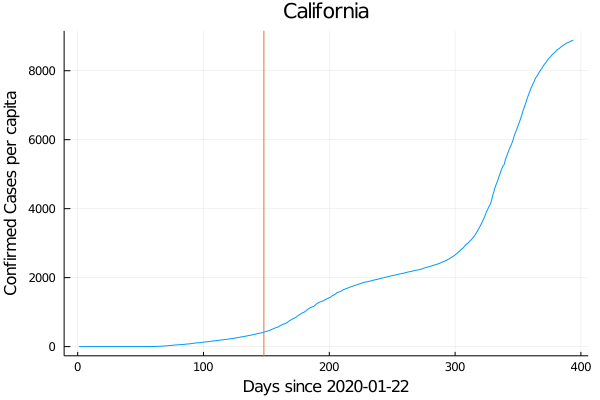

In [28]:
pop_california = 39.51 * 10^6
st_daily_cases_df.California_per_capita = st_daily_cases_df[!, :California] ./ (pop_california / 10^5)

@df st_daily_cases_df plot(
    :index, :California_per_capita, 
    legend=false,
    title="California",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)
plot!([148], seriestype="vline")

In [29]:
@where(mandate_state_df, :stname.=="New York")

,stname,mask_mandate_date,num_days
,String,String,Int64
1,New York,4/17/20,86


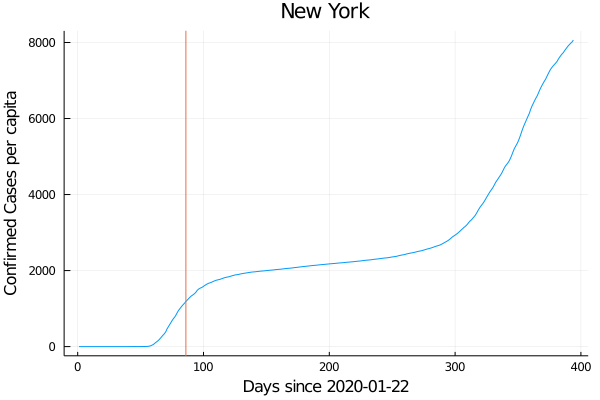

In [30]:
pop_new_york = 19.45 * 10^6
st_daily_cases_df.New_York_per_capita = st_daily_cases_df[!, :New_York] ./ (pop_new_york / 10^5)

@df st_daily_cases_df plot(
    :index, :New_York_per_capita, 
    legend=false,
    title="New York",
    xlabel="Days since 2020-01-22",
    ylabel="Confirmed Cases per capita"
)
plot!([86], seriestype="vline")

This concludes our analysis within the timeframe of the fellowship. It was very engaging to learn how to use Julia. Special thanks to our mentor, Ms. Kelly Shen.